# Machine Learning, Exercise 6
 王敏行 id:2018012386 wangmx18@mails.tsinghua.edu.cn
 
**All following codes originally generated by myself.**
Please see rm.md before running this file.

### Part 12: K-means clustering

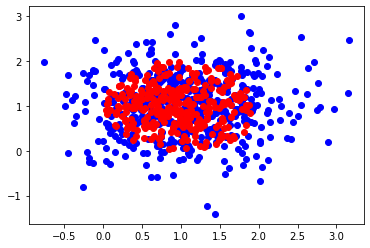

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# np.random.seed(0)

def make_cluster(mean, cov, n_sample,cutoff=False, rad=None):
    x = np.random.multivariate_normal(mean=mean, cov=cov,size=n_sample)
    if cutoff:
        dist = np.zeros((1,n_sample))
        for i in range(n_sample):
            dist[0,i]=np.linalg.norm(x[i,:]-mean, ord=2)
        mask = dist<rad
        mask =mask.T.ravel()
        x = x[mask,:]
    return x, x.shape[0]#, mask

test_x1,test_n1 = make_cluster([1,1], np.diag([0.5,0.5]),500, cutoff=True, rad=1)
test_x2,test_n2 = make_cluster([1,1], np.diag([0.5,0.5]),500, cutoff=False, rad=1)


plt.figure()
plt.scatter(test_x2[:,0],test_x2[:,1],color='blue')
plt.scatter(test_x1[:,0],test_x1[:,1],color='red')
plt.show()

### Data generation
#### (a) clearly separated clusters

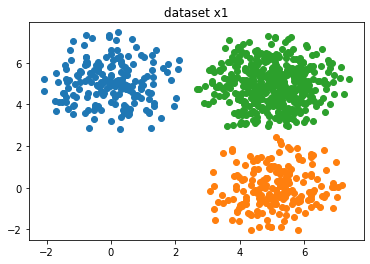

[193, 196, 456]


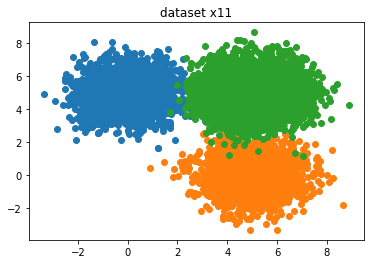

[2000, 2000, 5000]


In [2]:
c1=[[0,5],[5,0],[5,5]]
cov1=[np.diag([1,1]),np.diag([1,1]),np.diag([1,1])]
size1 = [200,200,500]
x1=[]
n1=[]

plt.figure()
for i in range(3):
    x_temp,n_temp = make_cluster(mean=c1[i],cov=cov1[i],n_sample=size1[i],cutoff=True,rad=2.5)
    x1.append(x_temp)
    n1.append(n_temp)
    plt.scatter(x1[i][:,0],x1[i][:,1])
plt.title('dataset x1')
plt.show()
print(n1)

size11 = [2000,2000,5000]
x11=[]
n11=[]

plt.figure()
for i in range(3):
    x_temp,n_temp = make_cluster(mean=c1[i],cov=cov1[i],n_sample=size11[i],rad=2.5)
    x11.append(x_temp)
    n11.append(n_temp)
    plt.scatter(x11[i][:,0],x11[i][:,1])
plt.title('dataset x11')
plt.show()
print(n11)

#### (b) overlapped data

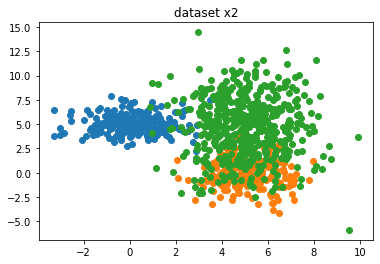

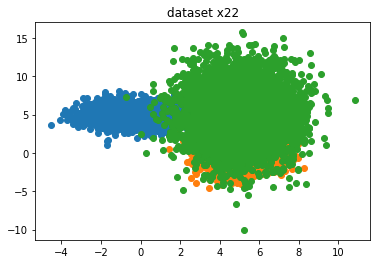

In [3]:
c2=[[0,5],[5,0],[5,5]]
cov2=[np.diag([2,1]),np.diag([1,2]),np.diag([2,10])]
size2 = [200,200,500]
x2=[]
n2=[]

plt.figure()
for i in range(3):
    x_temp,n_temp = make_cluster(mean=c2[i],cov=cov2[i],n_sample=size2[i],cutoff=False,rad=2.5)
    x2.append(x_temp)
    n2.append(n_temp)
    plt.scatter(x2[i][:,0],x2[i][:,1])
plt.title('dataset x2')
plt.show()

x22=[]
n22=[]

plt.figure()
for i in range(3):
    x_temp,n_temp = make_cluster(mean=c2[i],cov=cov2[i],n_sample=size11[i],cutoff=False,rad=2.5)
    x22.append(x_temp)
    n22.append(n_temp)
    plt.scatter(x22[i][:,0],x22[i][:,1])
plt.title('dataset x22')
plt.show()

It is rather sad that datasets `x2` and `x22` are both heavily overlapped. Their number of clusters could not be distinguished easily on the scatter plot.

#### (c) single cluster

C:\Users\Max\AppData\Local\Temp\ipykernel_3700\2535238824.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  x = np.random.multivariate_normal(mean=mean, cov=cov,size=n_sample)


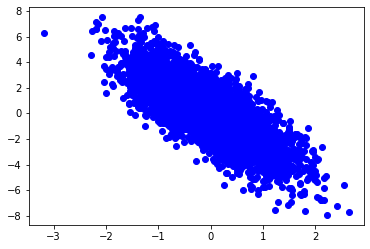

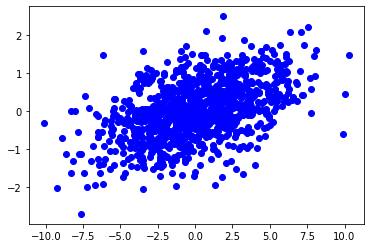

In [4]:
c3=(0,0)
cov3=np.array([[1,  -3],  [-1, 4]]) 
cov4 = np.array([[10,1],[5,1]])
size3=5000
x3,n3=make_cluster(mean=c3,cov=cov3,n_sample=size3)
x31,n31=make_cluster(mean=c3,cov=cov4,n_sample=size3//5)

plt.figure()
plt.scatter(x3[:,0],x3[:,1],color='blue')
plt.show()

plt.figure()
plt.scatter(x31[:,0],x31[:,1],color='blue')
plt.show()

### clustering with K-means

In [5]:
data=[]
data.append(np.concatenate((x1[0],x1[1],x1[2]), axis=0))
data.append(np.concatenate((x11[0],x11[1],x11[2]), axis=0))
data.append(np.concatenate((x2[0],x2[1],x2[2]), axis=0))
data.append(np.concatenate((x22[0],x22[1],x22[2]), axis=0))
data.append(x3)
data.append(x31)

def gen_label(ls):
    y=np.concatenate((np.zeros(ls[0]),np.ones(ls[1]),2*np.ones(ls[2])), axis=0)
    return y
label = [gen_label(n1),gen_label(n11),gen_label(n2),gen_label(n22)]

In [7]:
acc=[]
pred=[]

def cluster_acc_score(y_true, y_pred):
    acc = np.zeros(6)
    acc[0]=accuracy_score(y_true=y_true, y_pred=y_pred)
    acc[1]=accuracy_score(y_true=(y_true+1)%3, y_pred=y_pred)
    acc[2]=accuracy_score(y_true=(y_true+2)%3, y_pred=y_pred)
    acc[3]=accuracy_score(y_true=(-y_true)%3, y_pred=y_pred)
    acc[4]=accuracy_score(y_true=(-y_true+1)%3, y_pred=y_pred)
    acc[5]=accuracy_score(y_true=(-y_true+2)%3, y_pred=y_pred)
    return max(acc)


cls = KMeans(n_clusters=3, n_init=3)
for i in range(4):
    # i=0
    X_train,X_test,y_train,y_test = train_test_split(data[i],label[i])
    res = cls.fit(X_train,y_train)
    pred_train = res.predict(X_train)
    pred_test = res.predict(X_test)
    train_acc = cluster_acc_score(y_train, pred_train)
    test_acc = cluster_acc_score(y_test, pred_test)
    print('\ndataset:{}\ntrain acc:{:0.05},test acc:{:0.05}'.format(i+1,train_acc,test_acc))
    acc.append([train_acc,test_acc])
    pred.append([pred_train, pred_test])



dataset:1
train acc:1.0,test acc:1.0

dataset:2
train acc:0.9923,test acc:0.99378

dataset:3
train acc:0.77778,test acc:0.84

dataset:4
train acc:0.78696,test acc:0.77778
